In [1]:
import pandas as pd
import numpy as np

In [2]:
file_path = "../../Data/diabetes_dataset_processed.csv"
df = pd.read_csv(file_path)

In [3]:
df.describe()

,Insulin Levels,Age,BMI,Blood Pressure,Cholesterol Levels,Waist Circumference,Blood Glucose Levels,Weight Gain During Pregnancy,Pancreatic Health,Pulmonary Function,...,Physical Activity_Low,Physical Activity_Moderate,History of PCOS_No,History of PCOS_Yes,Previous Gestational Diabetes_No,Previous Gestational Diabetes_Yes,Steroid Use History_No,Steroid Use History_Yes,Family History_No,Family History_Yes
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,21.607443,32.020700,24.782943,111.339543,194.867200,35.051657,160.701657,15.496414,47.564243,70.264671,...,0.333543,0.334671,0.501443,0.498557,0.499500,0.500500,0.502029,0.497971,0.497600,0.502400
std,10.785852,21.043173,6.014236,19.945000,44.532466,6.803461,48.165547,9.633096,19.984683,11.965600,...,0.471482,0.471879,0.500001,0.500001,0.500003,0.500003,0.499999,0.499999,0.499998,0.499998
min,5.000000,0.000000,12.000000,60.000000,100.000000,20.000000,80.000000,0.000000,10.000000,30.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,14.000000,20.000000,99.000000,163.000000,30.000000,121.000000,7.000000,32.000000,63.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,19.000000,31.000000,25.000000,113.000000,191.000000,34.000000,152.000000,16.000000,46.000000,72.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
75%,28.000000,49.000000,29.000000,125.000000,225.000000,39.000000,194.000000,22.000000,64.000000,79.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,49.000000,79.000000,39.000000,149.000000,299.000000,54.000000,299.000000,39.000000,99.000000,89.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
df = df.dropna()

In [5]:
df.count()

Insulin Levels                       70000
Age                                  70000
BMI                                  70000
Blood Pressure                       70000
Cholesterol Levels                   70000
Waist Circumference                  70000
Blood Glucose Levels                 70000
Weight Gain During Pregnancy         70000
Pancreatic Health                    70000
Pulmonary Function                   70000
Neurological Assessments             70000
Digestive Enzyme Levels              70000
Birth Weight                         70000
Glucose Tolerance Test_Abnormal      70000
Glucose Tolerance Test_Normal        70000
Genetic Testing_Negative             70000
Genetic Testing_Positive             70000
Autoantibodies_Negative              70000
Autoantibodies_Positive              70000
Urine Test_Glucose Present           70000
Urine Test_Ketones Present           70000
Urine Test_Normal                    70000
Urine Test_Protein Present           70000
Cystic Fibr

In [6]:
def detect_outliers_zscore(data, threshold=3):
    from scipy.stats import zscore
    zs = zscore(data.select_dtypes(include='number'))
    return data[(abs(zs) > threshold).any(axis=1)]

outliers = detect_outliers_zscore(df)


In [7]:
print("Number of outliers detected:", len(outliers))

Number of outliers detected: 668


In [8]:
print(outliers)

       Insulin Levels  Age  BMI  Blood Pressure  Cholesterol Levels  \
120                12    5   17             103                 145   
369                18   16   15              99                 122   
384                18   10   15              85                 158   
526                11   15   16              96                 136   
703                10   14   15              81                 128   
...               ...  ...  ...             ...                 ...   
69274              18   10   15              95                 151   
69288              12   17   22             101                 114   
69478              19   14   21             106                 104   
69660              14    7   24             106                 169   
69664              11   10   22              92                 174   

       Waist Circumference  Blood Glucose Levels  \
120                     27                   265   
369                     30                 

In [9]:
df.drop(outliers.index, inplace=True)

In [11]:
df.count()

Insulin Levels                       69332
Age                                  69332
BMI                                  69332
Blood Pressure                       69332
Cholesterol Levels                   69332
Waist Circumference                  69332
Blood Glucose Levels                 69332
Weight Gain During Pregnancy         69332
Pancreatic Health                    69332
Pulmonary Function                   69332
Neurological Assessments             69332
Digestive Enzyme Levels              69332
Birth Weight                         69332
Glucose Tolerance Test_Abnormal      69332
Glucose Tolerance Test_Normal        69332
Genetic Testing_Negative             69332
Genetic Testing_Positive             69332
Autoantibodies_Negative              69332
Autoantibodies_Positive              69332
Urine Test_Glucose Present           69332
Urine Test_Ketones Present           69332
Urine Test_Normal                    69332
Urine Test_Protein Present           69332
Cystic Fibr

In [14]:
df.to_csv(file_path, index=False)

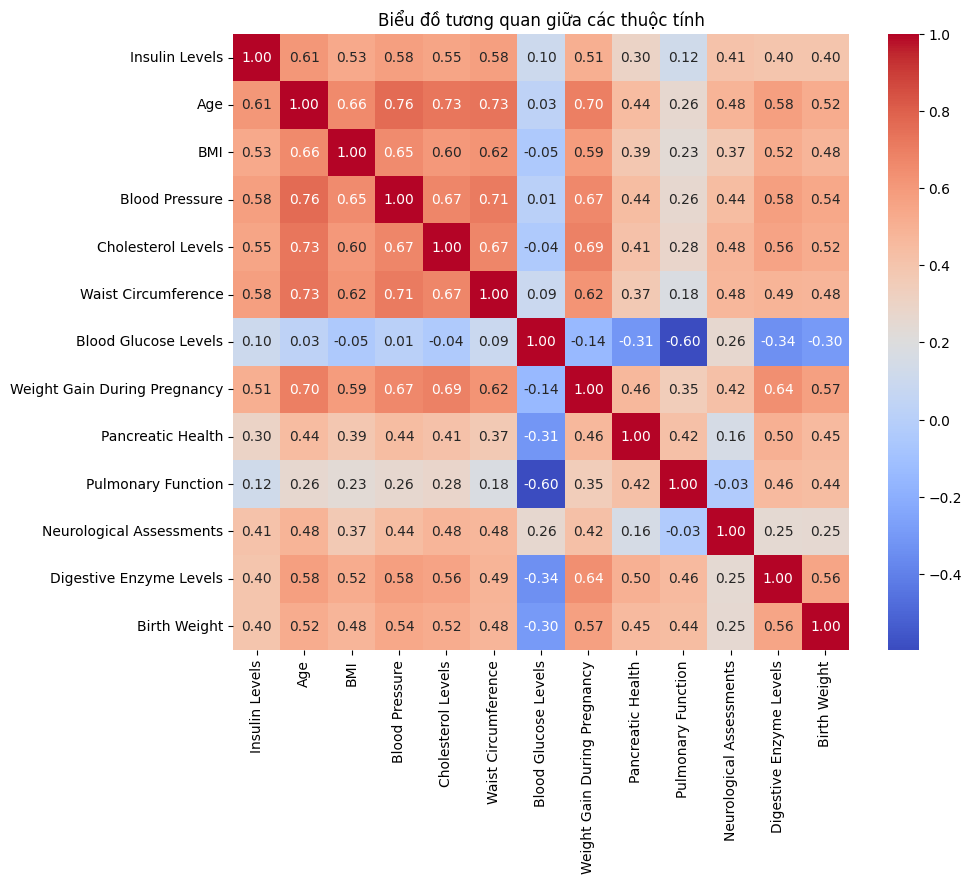

In [ ]:
file_path = "../../Data/diabetes_dataset.csv"
df = pd.read_csv(file_path)
import matplotlib.pyplot as plt
import seaborn as sns
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Biểu đồ tương quan giữa các thuộc tính')
plt.show()
